In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [0]:
Jugadores_DF = pd.read_excel(io.BytesIO(uploaded['data.xlsx']), encoding= 'unicode_escape')
Jugadores_DF.head()

,Cons,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,?110.5M,?565K,2202.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,?226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,?77M,?405K,2228.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,?127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,?118.5M,?290K,2143.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,?228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,?72M,?260K,1471.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,?138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,?102M,?355K,2281.0,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,?196.4M


In [0]:
VarNum = ['Overall', 'Crossing','Finishing',  'ShortPassing',  'Dribbling','LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility',  
           'Stamina','Volleys','FKAccuracy','Reactions','Balance','ShotPower','Strength','LongShots','Aggression','Interceptions','HeadingAccuracy','Curve',
           'Jumping','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']

VarInfo = ['ID', 'Name','Finishing','Nationality','Club','Position']

In [0]:
DFInfo = Jugadores_DF[VarInfo+VarNum]
DFHabil = Jugadores_DF[VarInfo+VarNum]
DFInfo = DFInfo.dropna()
DFInfo=DFInfo.reset_index(drop=True)
DFHabil = DFHabil.dropna()
DFHabil=DFHabil.reset_index(drop=True)

del DFHabil['ID']
del DFHabil['Name']
del DFHabil['Finishing']
del DFHabil['Nationality']
del DFHabil['Club']
del DFHabil['Position']

del DFInfo['Crossing']
del DFInfo['Finishing']
del DFInfo['ShortPassing']
del DFInfo['Dribbling']
del DFInfo['LongPassing']
del DFInfo['BallControl']
del DFInfo['Acceleration']
del DFInfo['SprintSpeed']
del DFInfo['Agility']
del DFInfo['Stamina']
del DFInfo['Volleys']
del DFInfo['FKAccuracy']
del DFInfo['Reactions']
del DFInfo['Balance']
del DFInfo['ShotPower']
del DFInfo['Strength']
del DFInfo['LongShots']
del DFInfo['Aggression']
del DFInfo['Interceptions']
del DFInfo['HeadingAccuracy']
del DFInfo['Curve']
del DFInfo['Jumping']
del DFInfo['Positioning']
del DFInfo['Vision']
del DFInfo['Penalties']
del DFInfo['Composure']
del DFInfo['Marking']
del DFInfo['StandingTackle']
del DFInfo['SlidingTackle']


DFInfo

,ID,Name,Nationality,Club,Position,Overall
0,158023,L. Messi,Argentina,FC Barcelona,RF,94
1,20801,Cristiano Ronaldo,Portugal,Juventus,ST,94
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,LW,92
3,193080,De Gea,Spain,Manchester United,GK,91
4,192985,K. De Bruyne,Belgium,Manchester City,RCM,91
...,...,...,...,...,...,...
17885,238813,J. Lundstram,England,Crewe Alexandra,CM,47
17886,243165,N. Christoffersson,Sweden,Trelleborgs FF,ST,47
17887,241638,B. Worman,England,Cambridge United,ST,47
17888,246268,D. Walker-Rice,England,Tranmere Rovers,RW,47


In [0]:
DFHabil

,Overall,Crossing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,84.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,86.0,94.0,95.0,95.0,85.0,59.0,94.0,48.0,22.0,70.0,93.0,68.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94,84.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,87.0,76.0,96.0,70.0,95.0,79.0,93.0,63.0,29.0,89.0,81.0,95.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92,79.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,84.0,87.0,94.0,84.0,80.0,49.0,82.0,56.0,36.0,62.0,88.0,61.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,91,17.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,13.0,19.0,90.0,43.0,31.0,64.0,12.0,38.0,30.0,21.0,21.0,67.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,91,93.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,82.0,83.0,91.0,77.0,91.0,75.0,91.0,76.0,61.0,55.0,85.0,63.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,47,34.0,49.0,42.0,45.0,43.0,54.0,57.0,60.0,40.0,25.0,34.0,49.0,76.0,43.0,47.0,38.0,46.0,46.0,40.0,30.0,55.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
17886,47,23.0,43.0,39.0,25.0,40.0,41.0,39.0,38.0,43.0,36.0,20.0,40.0,52.0,41.0,67.0,42.0,47.0,16.0,52.0,32.0,47.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
17887,47,25.0,38.0,45.0,28.0,44.0,70.0,69.0,50.0,55.0,38.0,27.0,47.0,58.0,45.0,32.0,45.0,32.0,15.0,46.0,38.0,60.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
17888,47,44.0,42.0,51.0,32.0,52.0,61.0,60.0,52.0,40.0,40.0,32.0,21.0,71.0,64.0,48.0,34.0,33.0,22.0,39.0,34.0,42.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


In [0]:
del DFHabil['Overall']
DFHabil.head()

,Crossing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,84.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,86.0,94.0,95.0,95.0,85.0,59.0,94.0,48.0,22.0,70.0,93.0,68.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,84.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,87.0,76.0,96.0,70.0,95.0,79.0,93.0,63.0,29.0,89.0,81.0,95.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,79.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,84.0,87.0,94.0,84.0,80.0,49.0,82.0,56.0,36.0,62.0,88.0,61.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,17.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,13.0,19.0,90.0,43.0,31.0,64.0,12.0,38.0,30.0,21.0,21.0,67.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,93.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,82.0,83.0,91.0,77.0,91.0,75.0,91.0,76.0,61.0,55.0,85.0,63.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [0]:
len(DFHabil)

17890

In [0]:
len(DFInfo)

17890

In [0]:
DFhabilNormal = DFHabil.transform(lambda x: (x - x.mean()) / x.std()) 
DFhabilNormal.head()
# SE NORMALIZAN LAS VARIABLES DE MODO QUE LOS CLUSTER NO SE BASEN EN CUANTO A SI EL JUGADOR TIENE UN DESEMPEÑO ALTO, SINO QUE SE BASE EN EL TIPO DE JUGADOR QUE ES.

,Crossing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,1.865397,2.131029,2.199433,2.238039,2.255326,1.766085,1.450544,1.861346,0.553296,2.433962,2.923756,3.676597,2.194557,1.713908,-0.504814,2.434600,-0.454129,-1.193000,1.018963,2.488980,0.243818,2.253950,2.871824,1.684905,3.269883,-0.717231,-0.908968,-0.923089
1,1.865397,1.517879,1.723379,1.584975,2.135286,1.632282,1.791409,1.590419,1.559888,2.490493,1.894114,3.787418,0.427235,2.294917,1.089440,2.382643,0.410024,-0.854757,2.112904,1.836477,2.524800,2.305182,2.021845,2.322086,3.182299,-0.968739,-0.770429,-1.064078
2,1.593013,1.722262,2.146538,1.650281,2.195306,1.966790,1.723236,2.200005,1.119504,2.320900,2.523340,3.565775,1.416936,1.423404,-1.301941,1.811108,0.006753,-0.516513,0.558357,2.217103,-0.347547,1.997791,2.376003,2.067213,3.094715,-1.019041,-1.093687,-0.594115
3,-1.784556,-0.594083,-1.979262,-0.112992,-0.985749,-0.508563,-0.458298,-0.238341,-1.271154,-1.692792,-1.366420,3.122487,-1.481472,-1.423540,-0.106251,-1.825931,-1.030231,-0.806436,-1.802252,-1.426039,0.159338,-1.947052,1.030202,-0.545225,0.817536,-1.622661,-1.232226,-1.534040
4,2.355689,2.267285,1.617590,2.499265,1.955226,0.896367,0.768815,1.048564,1.685713,2.207839,2.294530,3.233309,0.922086,2.062513,0.770589,2.278727,1.158957,0.691499,0.155326,2.053978,-0.178586,1.895328,2.871824,1.939777,2.569212,1.043328,0.476422,0.251817


In [0]:
len(DFhabilNormal)

17890

### Componentes Principales

###### Función Componentes Principales

In [0]:
# Function that apply Principal Component Analysis
def applyPCA(data, std):
    
    # Standardize the Data
    if std == True:
        x = StandardScaler().fit_transform(data.values)
    else:
        x = data.values
    
    ## Create a DataFrame from PCA
    pca = PCA(n_components = 2)
    pcaData = pca.fit_transform(x)
    pcaDF = pd.DataFrame(data = pcaData, columns = ["PC1", "PC2"])
    
    # Show the total explained variance ratio of model
    print('Explained Variance Ratio:', sum(pca.explained_variance_ratio_) * 100)
    
    return pcaDF;

##### Función Reemplazo de posición

In [0]:
# Function that replace the player position by the zone
def replacePositionByZone(data):
    data["Zone"] = data["Position"]
    
    for ix in range(len(DFInfo)):
        data["Zone"] = data["Zone"].replace(pcaDF.Position[ix], pcaDF.Zone[ix])
    
    return data;

In [0]:
# Apply the PCA algorithm
pcaDF = applyPCA(DFhabilNormal, True)
pcaDF = pd.DataFrame({'PC1' : pcaDF["PC1"],'PC2' : pcaDF["PC2"], 'Position':DFInfo["Position"]})
# Create the PCA data
pcaDF = replacePositionByZone(pcaDF)
pcaDF

Explained Variance Ratio: 69.64690212066895


,PC1,PC2,Position,Zone
0,-8.684000,-4.408783,RF,RF
1,-8.446089,-2.698312,ST,ST
2,-7.999071,-4.230762,LW,LW
3,4.631617,-0.629830,GK,GK
4,-8.733874,-0.718955,RCM,RCM
...,...,...,...,...
17885,3.098748,-0.513067,CM,CM
17886,5.496503,-1.258747,ST,ST
17887,3.808955,-3.163609,ST,ST
17888,3.700680,-2.994063,RW,RW


In [0]:
x = pcaDF['PC1'].values
y = pcaDF['PC2'].values
train = np.array(list(zip(x, y)))

### K-Means

In [0]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(train).score(train) for i in range(len(kmeans))]

##### Codo

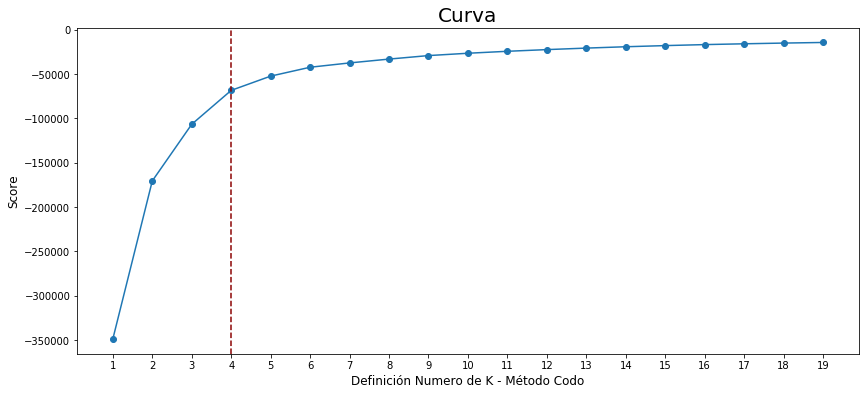

In [0]:
# Plot the results
fig, ax0 = plt.subplots(figsize = (14, 6))
plt.plot(Nc, score, marker='o')
plt.axvline(x = 4, color = "#8b0000", linestyle = "--")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Definición Numero de K - Método Codo", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.title("Curva", fontsize = 20)
plt.show()


### Definición de Cluster y Centroides

In [0]:
k_clusters = 4
kmeans = KMeans(n_clusters = k_clusters, algorithm = "elkan", random_state = 0)
kmeans = kmeans.fit(train)
clusters = kmeans.predict(train)
centroids = kmeans.cluster_centers_

In [0]:
DFCentroides=pd.DataFrame(centroids)
DFCentroides.columns = ['PC1','PC2']
DFCentroides["Cluster"] = 'Centroides'
DFCentroides

,PC1,PC2,Cluster
0,8.751288,-0.810902,Centroides
1,-0.676543,-2.262936,Centroides
2,-3.430830,0.466715,Centroides
3,0.954236,2.224008,Centroides


In [0]:
len(clusters)

17890

In [0]:
ParaPlotearDF=pd.DataFrame({'Posicion' : pcaDF["Position"],'PC1' : pcaDF['PC1'],'PC2' : pcaDF['PC2'], 'Cluster' : clusters})
ParaPlotearDF

,Posicion,PC1,PC2,Cluster
0,RF,-8.684000,-4.408783,2
1,ST,-8.446089,-2.698312,2
2,LW,-7.999071,-4.230762,2
3,GK,4.631617,-0.629830,0
4,RCM,-8.733874,-0.718955,2
...,...,...,...,...
17885,CM,3.098748,-0.513067,3
17886,ST,5.496503,-1.258747,0
17887,ST,3.808955,-3.163609,1
17888,RW,3.700680,-2.994063,1


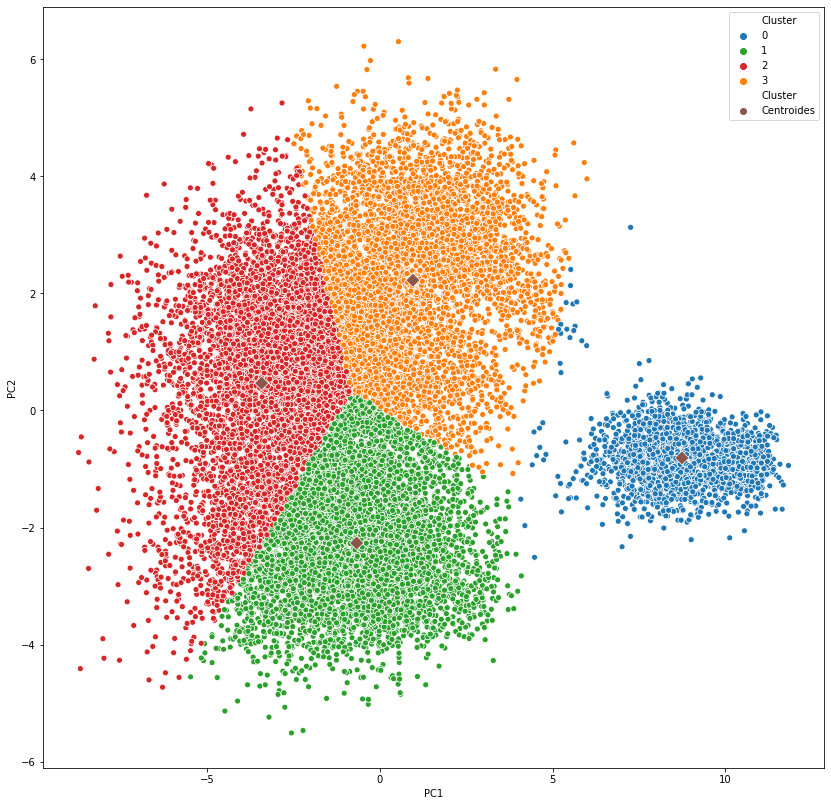

In [0]:
fig, ax1 = plt.subplots(figsize = (14, 14))
colors = ["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
nData = len(train)
color = {0: "#1f77b4", 1: "#2ca02c", 2:"#d62728", 3:"#ff7f0e", 'Centroides':"#8c564b"}
#for i in range(k_clusters):
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=ParaPlotearDF, palette=color)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=DFCentroides, palette = color, marker = "D", s = 100)

### Graficar Resultado

In [0]:
DFcluster = pd.DataFrame({'Posicion' : ParaPlotearDF["Posicion"],'Cluster' : ParaPlotearDF['Cluster']})
DFcluster

,Posicion,Cluster
0,RF,2
1,ST,2
2,LW,2
3,GK,0
4,RCM,2
...,...,...
17885,CM,3
17886,ST,0
17887,ST,1
17888,RW,1


In [0]:
DFcluster_Doom = pd.concat([DFcluster['Posicion'], pd.get_dummies(DFcluster['Cluster'])],axis=1) 

In [0]:
DFcluster_Doom

,Posicion,0,1,2,3
0,RF,0,0,1,0
1,ST,0,0,1,0
2,LW,0,0,1,0
3,GK,1,0,0,0
4,RCM,0,0,1,0
...,...,...,...,...,...
17885,CM,0,0,0,1
17886,ST,1,0,0,0
17887,ST,0,1,0,0
17888,RW,0,1,0,0


In [0]:
DFcluster_Doom = DFcluster_Doom.rename(columns={0: 'Cl 0', 1: 'Cl 1',2: 'Cl 2',3: 'Cl 3'})
DFcluster_Doom

,Posicion,Cl 0,Cl 1,Cl 2,Cl 3
0,RF,0,0,1,0
1,ST,0,0,1,0
2,LW,0,0,1,0
3,GK,1,0,0,0
4,RCM,0,0,1,0
...,...,...,...,...,...
17885,CM,0,0,0,1
17886,ST,1,0,0,0
17887,ST,0,1,0,0
17888,RW,0,1,0,0


In [0]:
DFcluster_Doom0 = DFcluster_Doom.groupby('Posicion')['Cl 0'].sum().to_frame().reset_index()
DFcluster_Doom1 = DFcluster_Doom.groupby('Posicion')['Cl 1'].sum().to_frame().reset_index()
DFcluster_Doom2 = DFcluster_Doom.groupby('Posicion')['Cl 2'].sum().to_frame().reset_index()
DFcluster_Doom3 = DFcluster_Doom.groupby('Posicion')['Cl 3'].sum().to_frame().reset_index()

In [0]:
DFcluster_Resumen = pd.DataFrame({'Posicion' : DFcluster_Doom0["Posicion"],'CL 0' : DFcluster_Doom0["Cl 0"],'Cl 1' : DFcluster_Doom2["Cl 2"],'Cl 2' : DFcluster_Doom3["Cl 3"],'Cl 3' : DFcluster_Doom1["Cl 1"]})
DFcluster_Resumen


,Posicion,CL 0,Cl 1,Cl 2,Cl 3
0,CAM,0.0,336.0,17.0,595.0
1,CB,17.0,125.0,1607.0,2.0
2,CDM,0.0,500.0,415.0,19.0
3,CF,0.0,16.0,1.0,57.0
4,CM,0.0,728.0,286.0,358.0
5,GK,1988.0,0.0,1.0,0.0
6,LAM,0.0,8.0,0.0,13.0
7,LB,0.0,669.0,594.0,40.0
8,LCB,0.0,99.0,536.0,1.0
9,LCM,0.0,297.0,34.0,57.0


In [0]:
#kkk = DFcluster_Resumen["CL 0"]+DFcluster_Resumen["CL 1"]
DFcluster_Resumen["ACUM A CL VOL"]= DFcluster_Resumen.iloc[:, 1:3].sum(axis=1)
DFcluster_Resumen["ACUM A CL DEF"]= DFcluster_Resumen.iloc[:, 1:4].sum(axis=1)
DFcluster_Resumen["ACUM A CL ATK"]= DFcluster_Resumen.iloc[:, 1:5].sum(axis=1)

DFcluster_Resumen.columns = ['Posicion','CL GK','CL VOL','CL DEF','CL ATK','ACUM A CL VOL','ACUM A CL DEF','ACUM A CL ATK']

DFcluster_Resumen["% CL GK"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["% CL VOL"] = DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["% CL DEF"] = DFcluster_Resumen.iloc[:, 3]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["% CL ATK"] = DFcluster_Resumen.iloc[:, 4]/DFcluster_Resumen.iloc[:, 7]


DFcluster_Resumen["%A CL GK"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["%A CL VOL"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7] + DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["%A CL DEF"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7] + DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]+DFcluster_Resumen.iloc[:, 3]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["%A CL ATK"] = DFcluster_Resumen.iloc[:, 1]/DFcluster_Resumen.iloc[:, 7] + DFcluster_Resumen.iloc[:, 2]/DFcluster_Resumen.iloc[:, 7]+DFcluster_Resumen.iloc[:, 3]/DFcluster_Resumen.iloc[:, 7]+DFcluster_Resumen.iloc[:, 4]/DFcluster_Resumen.iloc[:, 7]
DFcluster_Resumen["MAX"] = DFcluster_Resumen[["% CL GK", "% CL VOL",'% CL DEF',"% CL ATK"]].max(axis=1)
DFcluster_Resumen=DFcluster_Resumen.sort_values(by=['MAX'], ascending=False)

DFcluster_Resumen

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
5,GK,1988.0,0.0,1.0,0.0,1988.0,1989.0,1989.0,0.999497,0.000000,0.000503,0.000000,0.999497,0.999497,1.000000,1.0,0.999497
1,CB,17.0,125.0,1607.0,2.0,142.0,1749.0,1751.0,0.009709,0.071388,0.917761,0.001142,0.009709,0.081097,0.998858,1.0,0.917761
18,RCB,0.0,83.0,567.0,1.0,83.0,650.0,651.0,0.000000,0.127496,0.870968,0.001536,0.000000,0.127496,0.998464,1.0,0.870968
8,LCB,0.0,99.0,536.0,1.0,99.0,635.0,636.0,0.000000,0.155660,0.842767,0.001572,0.000000,0.155660,0.998428,1.0,0.842767
26,ST,3.0,319.0,42.0,1765.0,322.0,364.0,2129.0,0.001409,0.149836,0.019728,0.829028,0.001409,0.151245,0.170972,1.0,0.829028
24,RW,0.0,75.0,0.0,290.0,75.0,75.0,365.0,0.000000,0.205479,0.000000,0.794521,0.000000,0.205479,0.205479,1.0,0.794521
19,RCM,0.0,304.0,42.0,40.0,304.0,346.0,386.0,0.000000,0.787565,0.108808,0.103627,0.000000,0.787565,0.896373,1.0,0.787565
14,LW,0.0,82.0,2.0,290.0,82.0,84.0,374.0,0.000000,0.219251,0.005348,0.775401,0.000000,0.219251,0.224599,1.0,0.775401
3,CF,0.0,16.0,1.0,57.0,16.0,17.0,74.0,0.000000,0.216216,0.013514,0.770270,0.000000,0.216216,0.229730,1.0,0.770270
9,LCM,0.0,297.0,34.0,57.0,297.0,331.0,388.0,0.000000,0.765464,0.087629,0.146907,0.000000,0.765464,0.853093,1.0,0.765464


In [0]:
from google.colab import files
DFcluster_Resumen.to_csv('filename.csv') 
files.download('filename.csv')


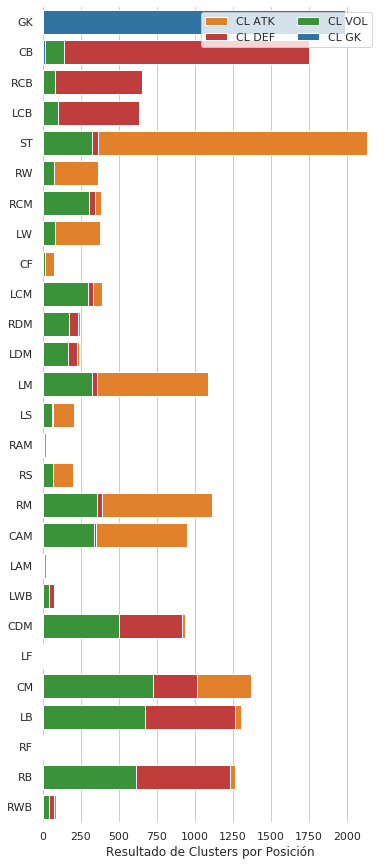

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Inicializar matplotlib
f, ax = plt.subplots(figsize=(6, 15))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen,
            label="CL DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

Se evidencia que hay posiciones que el algoritmo identifica de forma mas facil que otras. 
De esta Forma se evidencian cuatro grupos claros:
1. ARQUERO:
  - GK (GOAL KEEPER).
2. DEFENSAS: 
  - CB (CENTRE BACK).
  - RCB (RIGHT CENTRE BACK).
  - LCB(LEFT CENTRE BACK).
3. VOLANTES DEFENSIVOS: 
  - LDM(LEFT DEFENSIVE MIDFIELD).
  - RDM(RIGHT DEFENSIVE MIDFIELD).
  - RCM(RIGHT CENTRE MIDDLE).
  - LCM(LEFT CENTRE MIDDLE).
3. OFENSIVOS: 
  - RM (RIGHT MIDFIELD). 
  - LM (LEFT MIDFIELD).
  - RS (RIGHT STRICKER).
  - ST (STRIKER).
  - LS (LEFT STRICKER).
  - CF (CENTER FORWARD).
  - LW (LEFT WINGER).
  - RAM (RIGHT ATTACKING MIDFIELD).
  - RW (RIGHT WINGER).
  - CAM (CENTRE ATTACKING MIDFIELD).
  - LAM (LEFT ATTACKING MIDFIELD).

Por otro lado hay posiciones que no son claramente identificadas por el algoritmo. Estas son:
  - RB (RIGHT BACK)
  - LB (LEFT BACK)
  - RWB (RIGHT WING BACK)
  - LWB (LEFT WING BACK)
  - CDM (CENTRE DEFENSIVE MIDFIELD)
  - CM (CENTRE MIDFIELD)
  
Dichas posiciones, son precisamente aquellas que tienen un perfil mixto en el juego como lo son: Los laterales (Jugador que requiere condiciones de ataque y defensa) y el volante central defensivo (Jugador que tiene condiciones de volante defensivo y de defensa central).

Nota: Las posiciones LF (LEFT FORWARD), RF (RIGHT FORWARD), LAM Y RAM son posiciones escasas. Ninguna de ellas cuenta con más de 30 jugadores por lo que no serán analizadas en el ejercicio.



## GRAFICA DE BARRAS PARA LOS DEFENSAS

In [0]:
DFcluster_Resumen_DEF = DFcluster_Resumen[DFcluster_Resumen.Posicion.isin(['CB','RCB','LCB'])]
DFcluster_Resumen_DEF = DFcluster_Resumen_DEF.sort_values(by=["CL DEF"], ascending=False)
DFcluster_Resumen_DEF["% CL DEF"] = DFcluster_Resumen_DEF.iloc[:, 3]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["%A CL GK"] = DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["%A CL VOL"] = DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7] + DFcluster_Resumen_DEF.iloc[:, 2]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["%A CL DEF"] = DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7] + DFcluster_Resumen_DEF.iloc[:, 2]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 3]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF["%A CL ATK"] = DFcluster_Resumen_DEF.iloc[:, 1]/DFcluster_Resumen_DEF.iloc[:, 7] + DFcluster_Resumen_DEF.iloc[:, 2]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 3]/DFcluster_Resumen_DEF.iloc[:, 7]+DFcluster_Resumen_DEF.iloc[:, 4]/DFcluster_Resumen_DEF.iloc[:, 7]
DFcluster_Resumen_DEF

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
1,CB,17.0,125.0,1607.0,2.0,142.0,1749.0,1751.0,0.009709,0.071388,0.917761,0.001142,0.009709,0.081097,0.998858,1.0,0.917761
18,RCB,0.0,83.0,567.0,1.0,83.0,650.0,651.0,0.000000,0.127496,0.870968,0.001536,0.000000,0.127496,0.998464,1.0,0.870968
8,LCB,0.0,99.0,536.0,1.0,99.0,635.0,636.0,0.000000,0.155660,0.842767,0.001572,0.000000,0.155660,0.998428,1.0,0.842767


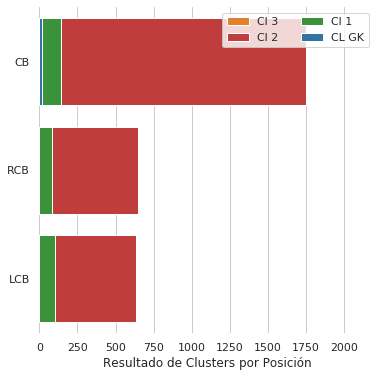

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl 3", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl 2", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl 1", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

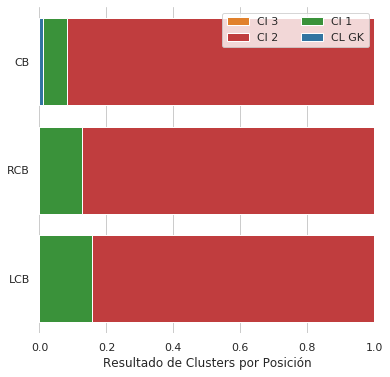

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="%A CL ATK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl 3", color="#ff7f0e")

sns.barplot(x="%A CL DEF", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl 2", color="#d62728")

sns.barplot(x="%A CL VOL", y="Posicion", data=DFcluster_Resumen_DEF,
            label="Cl 1", color="#2ca02c")

sns.barplot(x="%A CL GK", y="Posicion", data=DFcluster_Resumen_DEF,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

## GRAFICA DE BARRAS PARA LOS VOLANTES DEFENSIVOS

In [0]:
DFcluster_Resumen_VOL = DFcluster_Resumen[DFcluster_Resumen.Posicion.isin(['LDM','RDM','RCM','LCM'])]
DFcluster_Resumen_VOL = DFcluster_Resumen_VOL.sort_values(by=["CL VOL"], ascending=False)
DFcluster_Resumen_VOL["% CL VOL"] = DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL GK"] = DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL VOL"] = DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL DEF"] = DFcluster_Resumen_VOL.iloc[:, 3]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL["%A CL ATK"] = DFcluster_Resumen_VOL.iloc[:, 4]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 3]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 2]/DFcluster_Resumen_VOL.iloc[:, 7]+DFcluster_Resumen_VOL.iloc[:, 1]/DFcluster_Resumen_VOL.iloc[:, 7]
DFcluster_Resumen_VOL

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
19,RCM,0.0,304.0,42.0,40.0,304.0,346.0,386.0,0.0,0.787565,0.108808,0.103627,0.0,0.787565,0.896373,1.0,0.787565
9,LCM,0.0,297.0,34.0,57.0,297.0,331.0,388.0,0.0,0.765464,0.087629,0.146907,0.0,0.765464,0.853093,1.0,0.765464
20,RDM,0.0,174.0,61.0,11.0,174.0,235.0,246.0,0.0,0.707317,0.247967,0.044715,0.0,0.707317,0.955285,1.0,0.707317
10,LDM,0.0,166.0,61.0,12.0,166.0,227.0,239.0,0.0,0.694561,0.255230,0.050209,0.0,0.694561,0.949791,1.0,0.694561


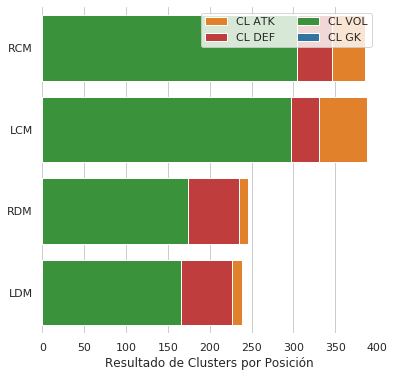

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

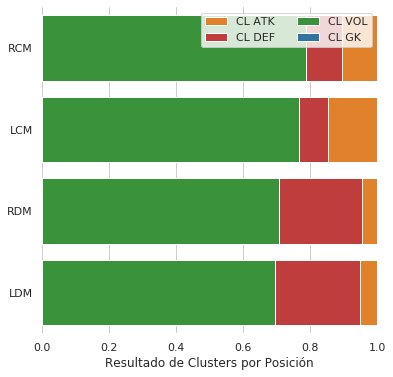

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 6))

# PLOTEAR

sns.barplot(x="%A CL ATK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="%A CL DEF", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL DEF", color="#d62728")

sns.barplot(x="%A CL VOL", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="%A CL GK", y="Posicion", data=DFcluster_Resumen_VOL,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

GRAFICA DE BARRAS PARA LOS JUGADORES OFENSIVOS

In [0]:
DFcluster_Resumen_OFN = DFcluster_Resumen[DFcluster_Resumen.Posicion.isin(['RM','LM','RS','ST','LS','CF','LW','RW','CAM'])]
DFcluster_Resumen_OFN = DFcluster_Resumen_OFN.sort_values(by=["CL ATK"], ascending=False)
DFcluster_Resumen_OFN["% CL ATK"] = DFcluster_Resumen_OFN.iloc[:, 4]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL GK"] = DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL VOL"] = DFcluster_Resumen_OFN.iloc[:, 2]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL DEF"] = DFcluster_Resumen_OFN.iloc[:, 3]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 2]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN["%A CL ATK"] = DFcluster_Resumen_OFN.iloc[:, 4]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 3]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 2]/DFcluster_Resumen_OFN.iloc[:, 7]+DFcluster_Resumen_OFN.iloc[:, 1]/DFcluster_Resumen_OFN.iloc[:, 7]
DFcluster_Resumen_OFN

,Posicion,CL GK,CL VOL,CL DEF,CL ATK,ACUM A CL VOL,ACUM A CL DEF,ACUM A CL ATK,% CL GK,% CL VOL,% CL DEF,% CL ATK,%A CL GK,%A CL VOL,%A CL DEF,%A CL ATK,MAX
26,ST,3.0,319.0,42.0,1765.0,322.0,364.0,2129.0,0.001409,0.149836,0.019728,0.829028,0.001409,0.151245,0.170972,1.0,0.829028
12,LM,0.0,326.0,28.0,730.0,326.0,354.0,1084.0,0.000000,0.300738,0.025830,0.673432,0.000000,0.300738,0.326568,1.0,0.673432
22,RM,0.0,357.0,33.0,723.0,357.0,390.0,1113.0,0.000000,0.320755,0.029650,0.649596,0.000000,0.320755,0.350404,1.0,0.649596
0,CAM,0.0,336.0,17.0,595.0,336.0,353.0,948.0,0.000000,0.354430,0.017932,0.627637,0.000000,0.354430,0.372363,1.0,0.627637
24,RW,0.0,75.0,0.0,290.0,75.0,75.0,365.0,0.000000,0.205479,0.000000,0.794521,0.000000,0.205479,0.205479,1.0,0.794521
14,LW,0.0,82.0,2.0,290.0,82.0,84.0,374.0,0.000000,0.219251,0.005348,0.775401,0.000000,0.219251,0.224599,1.0,0.775401
13,LS,0.0,64.0,3.0,138.0,64.0,67.0,205.0,0.000000,0.312195,0.014634,0.673171,0.000000,0.312195,0.326829,1.0,0.673171
23,RS,0.0,65.0,5.0,130.0,65.0,70.0,200.0,0.000000,0.325000,0.025000,0.650000,0.000000,0.325000,0.350000,1.0,0.650000
3,CF,0.0,16.0,1.0,57.0,16.0,17.0,74.0,0.000000,0.216216,0.013514,0.770270,0.000000,0.216216,0.229730,1.0,0.770270


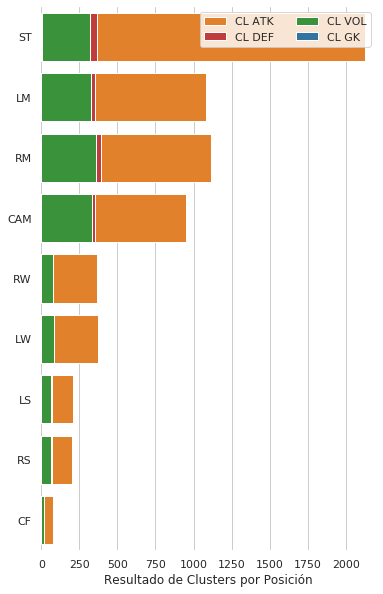

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 10))

# PLOTEAR

sns.barplot(x="ACUM A CL ATK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="ACUM A CL DEF", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL DEF", color="#d62728")

sns.barplot(x="ACUM A CL VOL", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="CL GK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

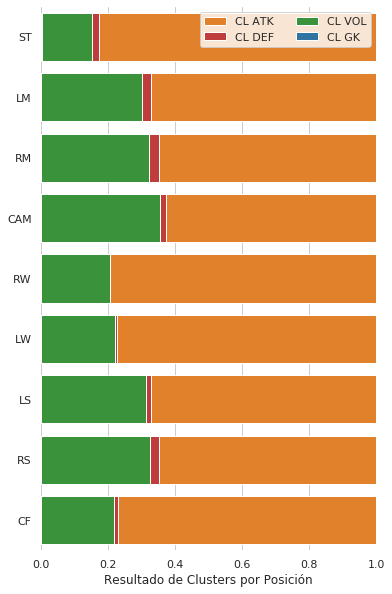

In [0]:
sns.set(style="whitegrid")
#GRAFICAR
f, ax = plt.subplots(figsize=(6, 10))

# PLOTEAR

sns.barplot(x="%A CL ATK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL ATK", color="#ff7f0e")

sns.barplot(x="%A CL DEF", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL DEF", color="#d62728")

sns.barplot(x="%A CL VOL", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL VOL", color="#2ca02c")

sns.barplot(x="%A CL GK", y="Posicion", data=DFcluster_Resumen_OFN,
            label="CL GK", color="#1f77b4")

## Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Resultado de Clusters por Posición")
sns.despine(left=True, bottom=True)

# EVIDENCIAR UBICACIÓN DE LAS POSICIONES DIFICILES DE IDENTIFICAR.

### JUGADORES CON CLUSTERS CORRECTAMENTE IDENTIFICADOS

In [0]:
ParaPlotearDF_PosOK = ParaPlotearDF[ParaPlotearDF.Posicion.isin(['GK','CB','RCB','LCB','LDM','RDM','RCM','LCM','RM','LM','RS','ST','LS','CF','LW','RW','CAM'])]
ParaPlotearDF_PosOK=ParaPlotearDF_PosOK.reset_index(drop=True)
ParaPlotearDF_PosOK


,Posicion,PC1,PC2,Cluster
0,ST,-8.446089,-2.698312,2
1,LW,-7.999071,-4.230762,2
2,GK,4.631617,-0.629830,0
3,RCM,-8.733874,-0.718955,2
4,RCM,-8.656535,-0.451767,2
...,...,...,...,...
12773,GK,10.953976,-1.240494,0
12774,ST,3.876129,-3.383836,1
12775,ST,5.496503,-1.258747,0
12776,ST,3.808955,-3.163609,1


## JUGADORES CON CLUSTERS CON IDENTIFICACIÓN DIFUSA - LATERALES

In [0]:
ParaPlotearDF_PosDIF_LAT = ParaPlotearDF[ParaPlotearDF.Posicion.isin(['RB','LB','RWB','LWB'])]
ParaPlotearDF_PosDIF_LAT.loc[:,'Cluster']=4
ParaPlotearDF_PosDIF_LAT=ParaPlotearDF_PosDIF_LAT.reset_index(drop=True)
ParaPlotearDF_PosDIF_LAT

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Posicion,PC1,PC2,Cluster
0,LB,-8.252267,1.786985,4
1,LB,-7.321387,1.269859,4
2,LB,-7.205906,2.190081,4
3,RB,-6.177047,3.092043,4
4,LB,-7.873376,1.318967,4
...,...,...,...,...
2728,RB,3.643727,0.101616,4
2729,RB,2.681540,-0.934570,4
2730,LB,4.224608,0.421025,4
2731,RB,4.718591,-0.210375,4


## Ubicación de laterales en el mapa de cluster

In [0]:
x2 = ParaPlotearDF_PosDIF_LAT['PC1'].values
y2 = ParaPlotearDF_PosDIF_LAT['PC2'].values
train2 = np.array(list(zip(x2, y2)))

k_clusters2 = 1
kmeans2 = KMeans(n_clusters = k_clusters2, algorithm = "elkan", random_state = 0)
kmeans2 = kmeans2.fit(train2)
centroids2 = kmeans2.cluster_centers_
centroids2

array([[-1.2868207 ,  1.20197369]])

In [0]:
DFcentroids2=pd.DataFrame({'PC1' :[centroids2[0,0]],'PC2':[centroids2[0,1]],"Cluster":5})
DFcentroids2

,PC1,PC2,Cluster
0,-1.286821,1.201974,5


In [0]:
centroids2[0,0]

-1.28682070078407

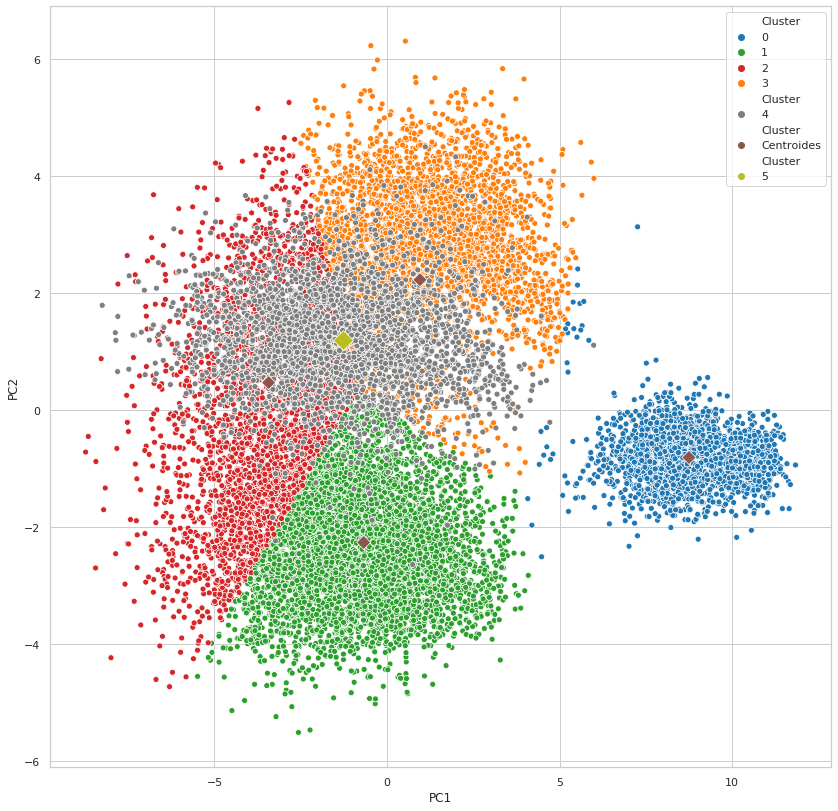

In [0]:
fig, ax1 = plt.subplots(figsize = (14, 14))
colors = ["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
nData = len(train)
color = {0: "#1f77b4", 1: "#2ca02c", 2:"#d62728", 3:"#ff7f0e",4:"#7f7f7f", 5:"#bcbd22", 'Centroides':"#8c564b"}
#for i in range(k_clusters):
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=ParaPlotearDF_PosOK, palette=color)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=ParaPlotearDF_PosDIF_LAT, palette=color)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=DFCentroides, palette = color, marker = "D", s = 100)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=DFcentroids2, palette = color, marker = "D", s = 200)

In [0]:
x2 = ParaPlotearDF_PosDIF_LAT['PC1'].values
y2 = ParaPlotearDF_PosDIF_LAT['PC2'].values
train2 = np.array(list(zip(x2, y2)))

###CENTROIDE DE LOS LATERALES

In [0]:
k_clusters2 = 1
kmeans2 = KMeans(n_clusters = k_clusters2, algorithm = "elkan", random_state = 0)
kmeans2 = kmeans2.fit(train2)
centroids2 = kmeans2.cluster_centers_
centroids2

array([[-1.2868207 ,  1.20197369]])

## JUGADORES CON CLUSTERS CON IDENTIFICACIÓN DIFUSA - VOLANTES CENTRALES DEFENSIVOS

In [0]:
ParaPlotearDF_PosDIF_VOLDEF = ParaPlotearDF[ParaPlotearDF.Posicion.isin(['CDM','CM'])]
ParaPlotearDF_PosDIF_VOLDEF.loc[:,'Cluster']=5
ParaPlotearDF_PosDIF_VOLDEF=ParaPlotearDF_PosDIF_VOLDEF.reset_index(drop=True)
ParaPlotearDF_PosDIF_VOLDEF

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Posicion,PC1,PC2,Cluster
0,CDM,-5.615725,3.602333,5
1,CDM,-6.253743,3.866656,5
2,CM,-7.703236,-0.704334,5
3,CDM,-7.609706,0.442647,5
4,CDM,-6.756820,2.393772,5
...,...,...,...,...
2301,CM,2.915306,-0.298703,5
2302,CM,2.048891,-1.732963,5
2303,CM,3.254385,0.220445,5
2304,CM,3.098748,-0.513067,5


In [0]:
x3 = ParaPlotearDF_PosDIF_VOLDEF['PC1'].values
y3 = ParaPlotearDF_PosDIF_VOLDEF['PC2'].values
train3 = np.array(list(zip(x3, y3)))

k_clusters3 = 1
kmeans3 = KMeans(n_clusters = k_clusters3, algorithm = "elkan", random_state = 0)
kmeans3 = kmeans3.fit(train3)
centroids3 = kmeans3.cluster_centers_
centroids3

array([[-1.59826253,  0.70663438]])

In [0]:
DFcentroids3=pd.DataFrame({'PC1' :[centroids3[0,0]],'PC2':[centroids3[0,1]],"Cluster":6})
DFcentroids3

,PC1,PC2,Cluster
0,-1.598263,0.706634,6


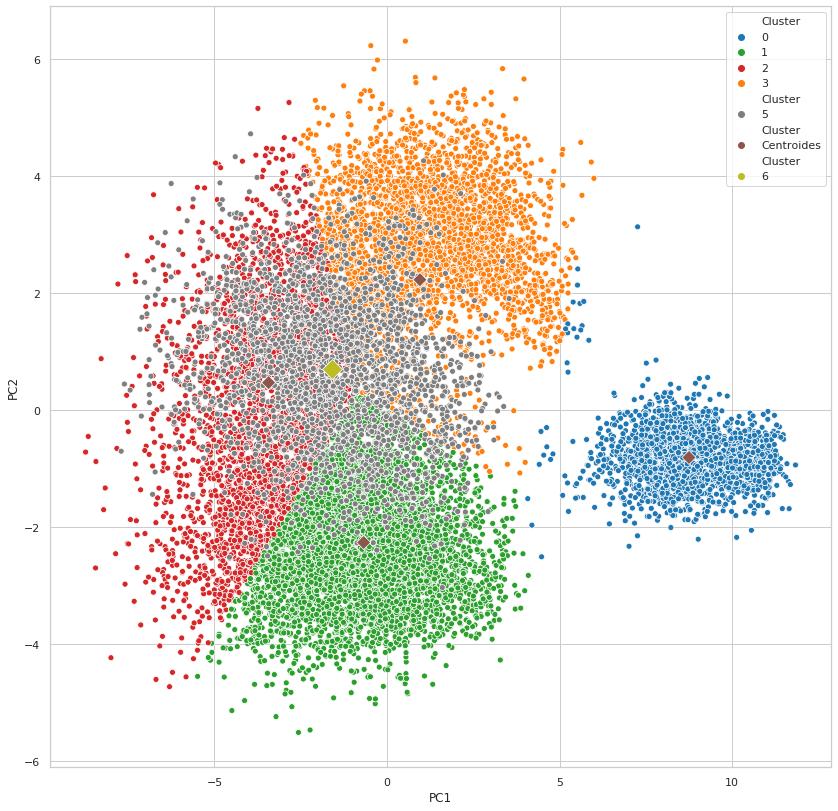

In [0]:
fig, ax1 = plt.subplots(figsize = (14, 14))
colors = ["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
nData = len(train)
color = {0: "#1f77b4", 1: "#2ca02c", 2:"#d62728", 3:"#ff7f0e",5:"#7f7f7f", 6:"#bcbd22",'Centroides':"#8c564b"}
#for i in range(k_clusters):
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=ParaPlotearDF_PosOK, palette=color)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=ParaPlotearDF_PosDIF_VOLDEF, palette=color)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=DFCentroides, palette = color, marker = "D", s = 100)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=DFcentroids3, palette = color, marker = "D", s = 200)

Se evidencia que los volantes defensivos centrales son los jugadores mas polivalentes en cuanto a los clusters evidenciados. Para este grupo no se definirá un nuevo centroide, ya que con mayor probabilidad este nuevo clusters afectaria los resultados de las otras posiciones. 



```
# Tiene formato de código
```

# K-MEANS CON SELECCIÓN INICIAL DE UBICACIÓN DE CLUSTER

In [0]:
startpts=np.array([[8.75128842, -0.81090204], [-0.67654273, -2.26293644], [-3.43083, 0.46671504], [0.95423642, 2.22400822], [-1.2868207 ,  1.20197369]], np.float64)
k_clusters = 5
kmeans3 = KMeans(n_clusters = k_clusters, algorithm = "elkan", init=startpts, random_state = 0, n_init=1,max_iter=1)
kmeans3 = kmeans3.fit(train)
clusters3 = kmeans3.predict(train)
centroids3 = kmeans3.cluster_centers_

In [0]:
DFCentroides3=pd.DataFrame(centroids3)
DFCentroides3.columns = ['PC1','PC2']
DFCentroides3["Cluster"] = 'Centroides'
DFCentroides3

,PC1,PC2,Cluster
0,8.756611,-0.814469,Centroides
1,-0.676944,-2.366480,Centroides
2,-3.985178,0.126064,Centroides
3,1.631755,2.418396,Centroides
4,-1.322629,1.403298,Centroides


In [0]:
len(clusters3)

17890

In [0]:
ParaPlotearDF3=pd.DataFrame({'Posicion' : pcaDF["Position"],'PC1' : pcaDF['PC1'],'PC2' : pcaDF['PC2'], 'Cluster' : clusters3})
ParaPlotearDF3

,Posicion,PC1,PC2,Cluster
0,RF,-8.684000,-4.408783,2
1,ST,-8.446089,-2.698312,2
2,LW,-7.999071,-4.230762,2
3,GK,4.631617,-0.629830,0
4,RCM,-8.733874,-0.718955,2
...,...,...,...,...
17885,CM,3.098748,-0.513067,3
17886,ST,5.496503,-1.258747,0
17887,ST,3.808955,-3.163609,1
17888,RW,3.700680,-2.994063,1


In [0]:
ParaPlotearDF3_Doom = pd.concat([ParaPlotearDF3['Posicion'], pd.get_dummies(ParaPlotearDF3['Cluster'])],axis=1)
ParaPlotearDF3_Doom = ParaPlotearDF3_Doom.rename(columns={0: 'Cl 0', 1: 'Cl 1',2: 'Cl 2',3: 'Cl 3',4: 'Cl 4'})
ParaPlotearDF3_Doom

,Posicion,Cl 0,Cl 1,Cl 2,Cl 3,Cl 4
0,RF,0,0,1,0,0
1,ST,0,0,1,0,0
2,LW,0,0,1,0,0
3,GK,1,0,0,0,0
4,RCM,0,0,1,0,0
...,...,...,...,...,...,...
17885,CM,0,0,0,1,0
17886,ST,1,0,0,0,0
17887,ST,0,1,0,0,0
17888,RW,0,1,0,0,0


In [0]:
DFcluster2_Doom0 = ParaPlotearDF3_Doom.groupby('Posicion')['Cl 0'].sum().to_frame().reset_index()
DFcluster2_Doom1 = ParaPlotearDF3_Doom.groupby('Posicion')['Cl 1'].sum().to_frame().reset_index()
DFcluster2_Doom2 = ParaPlotearDF3_Doom.groupby('Posicion')['Cl 2'].sum().to_frame().reset_index()
DFcluster2_Doom3 = ParaPlotearDF3_Doom.groupby('Posicion')['Cl 3'].sum().to_frame().reset_index()
DFcluster2_Doom4 = ParaPlotearDF3_Doom.groupby('Posicion')['Cl 4'].sum().to_frame().reset_index()

In [0]:
DFcluster2_Resumen = pd.DataFrame({'Posicion' : DFcluster2_Doom0["Posicion"],'CL 0' : DFcluster2_Doom0["Cl 0"],'Cl 1' : DFcluster2_Doom1["Cl 1"],'Cl 2' : DFcluster2_Doom2["Cl 2"],'Cl 3' : DFcluster2_Doom3["Cl 3"],'Cl 4' : DFcluster2_Doom4["Cl 4"]})
DFcluster2_Resumen

,Posicion,CL 0,Cl 1,Cl 2,Cl 3,Cl 4
0,CAM,0.0,569.0,324.0,6.0,49.0
1,CB,8.0,1.0,24.0,1363.0,355.0
2,CDM,0.0,9.0,221.0,192.0,512.0
3,CF,0.0,54.0,18.0,0.0,2.0
4,CM,0.0,292.0,452.0,119.0,509.0
5,GK,1986.0,0.0,0.0,3.0,0.0
6,LAM,0.0,13.0,8.0,0.0,0.0
7,LB,0.0,22.0,341.0,305.0,635.0
8,LCB,0.0,1.0,24.0,394.0,217.0
9,LCM,0.0,46.0,222.0,13.0,107.0


In [0]:
from google.colab import files
DFcluster2_Resumen.to_csv('filename.csv') 
files.download('filename.csv')


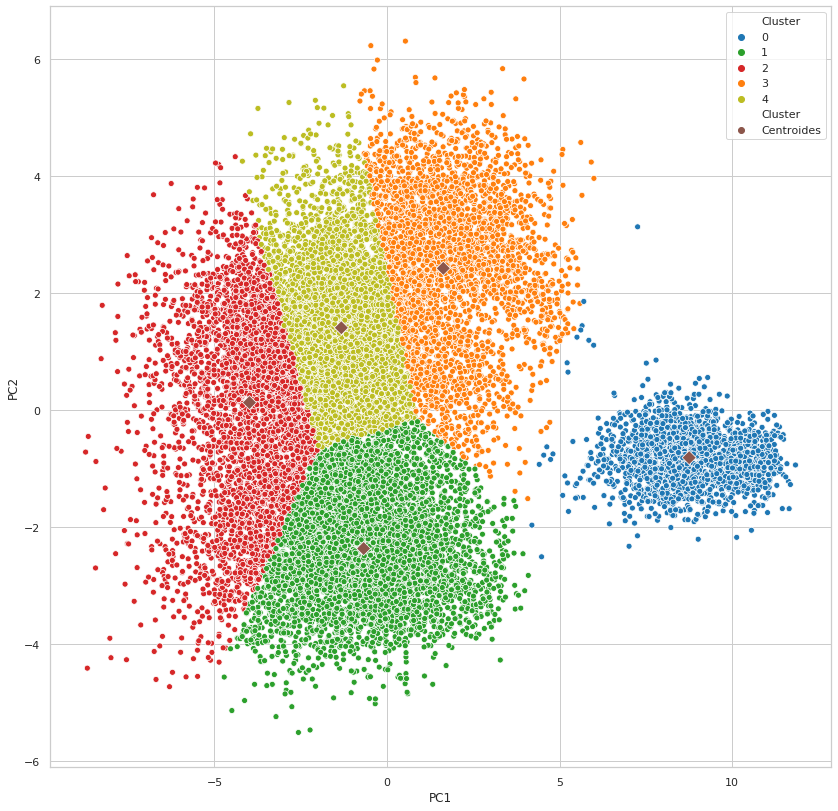

In [0]:
fig, ax1 = plt.subplots(figsize = (14, 14))
colors = ["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
nData = len(train)
color = {0: "#1f77b4", 1: "#2ca02c", 2:"#d62728", 3:"#ff7f0e", 4:"#bcbd22",'Centroides':"#8c564b"}
#for i in range(k_clusters):
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=ParaPlotearDF3, palette=color)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=DFCentroides3, palette = color, marker = "D", s = 100)